In [1]:
import numpy as np
import pandas as pd
from osgeo import gdal

In [2]:
testTif = gdal.Open("H:\\XCO2\\MappingXCO2\\MappingXCO2_month\\MappingXCO2_200904.tif")

test_width = testTif.RasterXSize  # 栅格矩阵的列数
test_height = testTif.RasterYSize  # 栅格矩阵的行数
test_bands = testTif.RasterCount  # 波段数

print(test_width, test_height, test_bands)

360 180 1


In [3]:
#仿射矩阵，左上角像素的大地坐标和像素分辨率。
#共有六个参数，分表代表左上角x坐标；东西方向上图像的分辨率；如果北边朝上，地图的旋转角度，0表示图像的行与x轴平行；左上角y坐标；
#如果北边朝上，地图的旋转角度，0表示图像的列与y轴平行；南北方向上地图的分辨率。
test_geotrans = testTif.GetGeoTransform()
test_geotrans

(-180.0, 1.0, 0.0, 90.0, 0.0, -1.0)

In [4]:
# 用ReadAsArray(<xOff>, <yOff>, <xSize>, <ySize>)，读出从(xOff,yOff)开始，大小为(xSize,ySize)的矩阵。
testBand = testTif.GetRasterBand(1)
testData = testBand.ReadAsArray(0, 0, test_width, test_height)

testData

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_16640\131984314.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


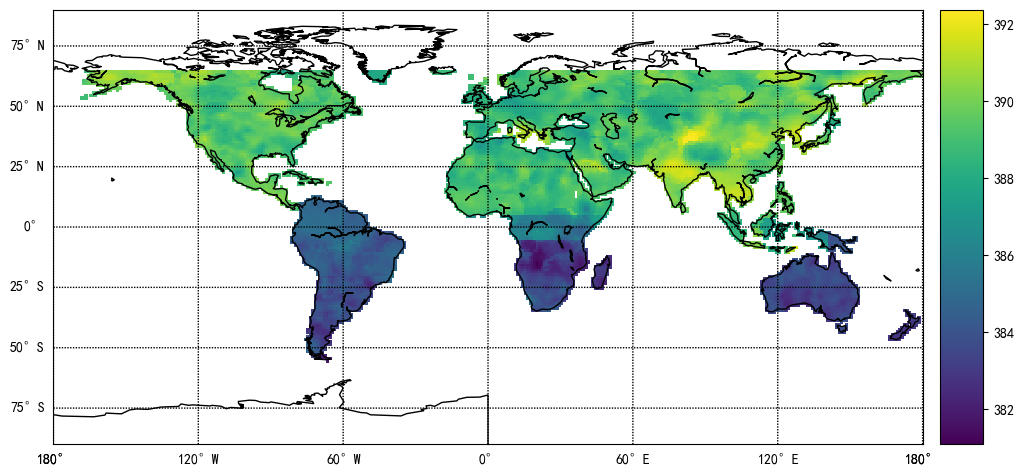

In [6]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

testData = np.flip(testData, axis=0)  # 坐标原因，需要上下颠倒

mapPlot = Map.pcolor(x, y, testData, cmap='viridis')
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [7]:
# 输出月文件
inPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_month"
outPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_month_npy"
width = 360
height = 180

for year in range(2010, 2021):
    for month in range(1, 13):
        tif = gdal.Open(f"H:\\XCO2\\MappingXCO2\\MappingXCO2_month\\MappingXCO2_{year}{str(month).zfill(2)}.tif")
        band = tif.GetRasterBand(1)
        data_month = np.flip(band.ReadAsArray(0, 0, width, height), axis=0)  # 磁场颠佬
        np.save(outPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy", data_month)

C:\Users\alzio\AppData\Local\Temp\ipykernel_16640\3899287701.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


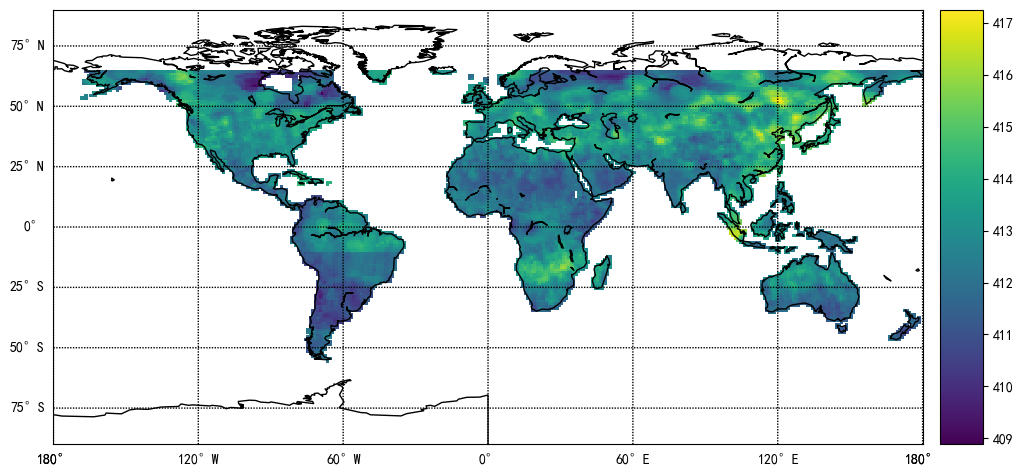

In [8]:
test = np.load(outPath + "\\MappingXCO2_202011.npy")

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, test, cmap='viridis')
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [11]:
# 算年平均
inPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_month"
outPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_year"
width = 360
height = 180

for year in range(2010, 2021):
    data_year = []
    for month in range(1, 13):
        tif = gdal.Open(f"H:\\XCO2\\MappingXCO2\\MappingXCO2_month\\MappingXCO2_{year}{str(month).zfill(2)}.tif")
        band = tif.GetRasterBand(1)
        data_month = band.ReadAsArray(0, 0, width, height)
        data_month[np.isnan(data_month)] = -9999.0
        data_month = np.flip(data_month, axis=0)  # 磁场颠佬
        data_year.append(data_month)
    data_year = np.array(data_year).mean(axis=0)
    np.save(outPath + "\\" + f"MappingXCO2_{year}.npy", data_year)

C:\Users\alzio\AppData\Local\Temp\ipykernel_19064\2479500005.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


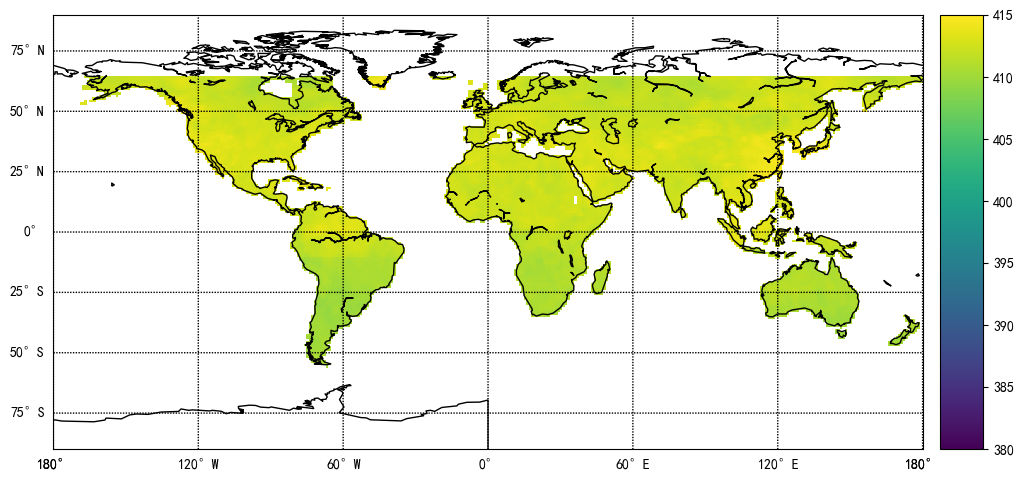

In [17]:
test = np.load(outPath + "\\MappingXCO2_2020.npy")

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, test, cmap='viridis', vmin=380.0, vmax=415.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()